<a href="https://colab.research.google.com/github/archie46/Deep-Learning-Lab/blob/main/Sonnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sonnets.txt to sonnets.txt


In [ ]:
tokenizer = Tokenizer()

data = open('sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'to': 3, 'my': 4, 'of': 5, 'i': 6, 'in': 7, 'that': 8, 'thy': 9, 'thou': 10, 'with': 11, 'for': 12, 'is': 13, 'love': 14, 'not': 15, 'a': 16, 'me': 17, 'but': 18, 'thee': 19, 'so': 20, 'be': 21, 'as': 22, 'all': 23, 'it': 24, 'you': 25, 'which': 26, 'his': 27, 'when': 28, 'this': 29, 'your': 30, 'by': 31, 'doth': 32, 'self': 33, 'do': 34, 'from': 35, 'on': 36, 'or': 37, 'no': 38, 'have': 39, 'then': 40, 'what': 41, 'are': 42, 'if': 43, 'more': 44, 'mine': 45, 'their': 46, 'shall': 47, 'will': 48, 'sweet': 49, 'time': 50, 'eyes': 51, 'beauty': 52, 'nor': 53, 'they': 54, 'art': 55, 'her': 56, 'yet': 57, 'heart': 58, 'o': 59, 'than': 60, 'now': 61, 'should': 62, 'thine': 63, 'fair': 64, 'can': 65, 'make': 66, 'he': 67, 'one': 68, 'hath': 69, 'where': 70, 'still': 71, 'how': 72, 'him': 73, 'true': 74, 'eye': 75, 'like': 76, 'see': 77, 'am': 78, 'she': 79, 'those': 80, 'though': 81, 'being': 82, 'some': 83, 'such': 84, 'own': 85, 'were': 86, 'dost': 87, 'who': 88, 'live

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(xs[6])

[  0   0   0   0   0   0  35 412 874 162]


In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)

Epoch 1/100
485/485 [==============================] - 37s 69ms/step - loss: 6.8744 - accuracy: 0.0218
Epoch 2/100
485/485 [==============================] - 33s 67ms/step - loss: 6.4217 - accuracy: 0.0320
Epoch 3/100
485/485 [==============================] - 33s 69ms/step - loss: 6.1756 - accuracy: 0.0418
Epoch 4/100
485/485 [==============================] - 32s 66ms/step - loss: 5.9031 - accuracy: 0.0521
Epoch 5/100
485/485 [==============================] - 33s 69ms/step - loss: 5.5866 - accuracy: 0.0625
Epoch 6/100
485/485 [==============================] - 33s 68ms/step - loss: 5.2285 - accuracy: 0.0784
Epoch 7/100
485/485 [==============================] - 34s 71ms/step - loss: 4.8265 - accuracy: 0.0984
Epoch 8/100
485/485 [==============================] - 34s 71ms/step - loss: 4.4018 - accuracy: 0.1342
Epoch 9/100
485/485 [==============================] - 33s 69ms/step - loss: 3.9656 - accuracy: 0.1923
Epoch 10/100
485/485 [==============================] - 35s 72ms/step - l

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

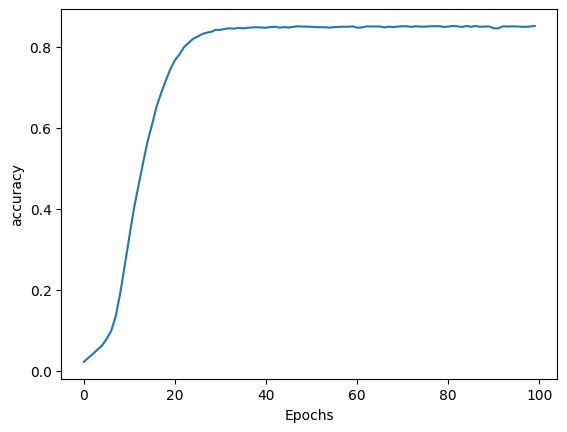

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 23ms/step
I've got a bad feeling about this a common night doth show still seen sweets faith lascivious draw grow shows couplement now pine keen night lies forty rightly thereby friend ah think beside his mind main light mutual stand prove me seen 'twixt mind being shall say works on thy face eye painted me summer doth lie hid faith should see old eyes she thee thy spirit a mind use worth seen you holds me newer lies lies so near you lies thee in my verse hate account wrong account treasure pride i prove faith not thee not not thee new love ' love that ornament and
